In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from skimage import measure
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from PIL import Image, ImageDraw
from scipy.ndimage import gaussian_filter
import matplotlib.image as mpimg

In [3]:
import sys  
sys.path.insert(0, r"D:\Studia\sem7\inzynierka\aplikacja\ImagingCOVID-19\Methods")

import Grayscale as gray
import PixelArrays as array
import LungSegmentation.LungSegmentationUtilities as util

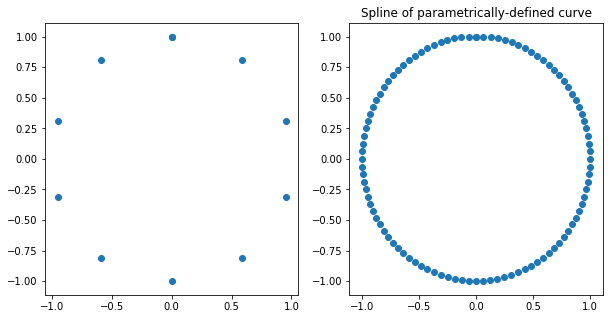

In [4]:
t = np.arange(0, 1.1, .1)
x = np.sin(2*np.pi*t)
y = np.cos(2*np.pi*t)
# xy = list(zip(x,y))

tck, u = interpolate.splprep([x,y], s=0)
unew = np.arange(0, 1.01, 0.01)
out = interpolate.splev(unew, tck)
# out = interpolate.splev(u, tck)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10,5])
ax1.scatter(x, y)
ax2.scatter(out[0], out[1])
plt.title('Spline of parametrically-defined curve')
plt.show()

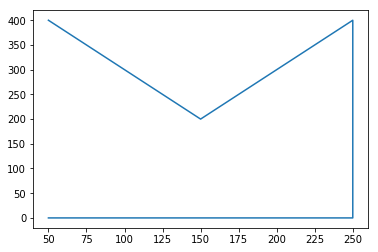

In [5]:
xy = [(50,0), (150, 0),  (250, 0), (250, 400), (150, 200), (50, 400)]
x = [item1 for item1, item2 in xy]
y = [item2 for item1, item2 in xy]
plt.plot(x, y)

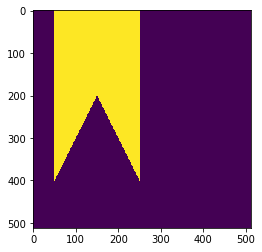

In [6]:
xy_flag = [(50,0), (150, 0),  (250, 0), (250, 400), (150, 200), (50, 400)]
x = [x for x, y in xy_flag]
y = [y for x, y in xy_flag]
mask = util.fill_polygon_points(np.zeros((512, 512)), xy_flag)
plt.imshow(mask)
out = util.fill_contours(mask, smoothing=True)

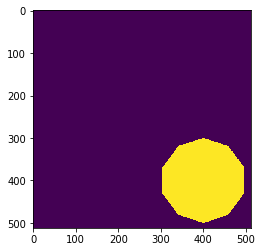

In [7]:
t = np.arange(0, 1.1, .1)
x = np.sin(2*np.pi*t)
y = np.cos(2*np.pi*t)
xy_circle = list(zip(x*100+400, y*100+400))

mask = util.fill_polygon_points(np.zeros((512, 512)), xy_circle)
plt.imshow(mask)
out = util.fill_contours(mask, smoothing=True)

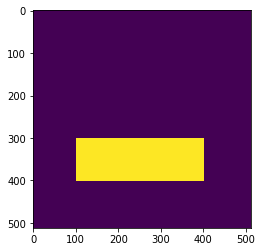

In [8]:
xy_rect = [(100, 400), (400, 400), (400, 300), (100, 300)]
mask = util.fill_polygon_points(np.zeros((512, 512)), xy_rect)
plt.imshow(mask)
out = util.fill_contours(mask, smoothing=True)

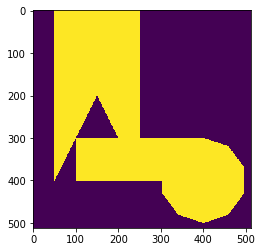

In [9]:
marks = [xy_flag, xy_circle, xy_rect]
mask = util.fill_selected_regions_on_mask((512, 512), marks)

plt.imshow(mask)